# Projeto ANN: Multilayer Perceptron (MLP)

Ana Paula Ferrari Januário

Suponha que trabalha para a IOT Company, especializada em sistemas de automação predial que usam sensores para medir vários atributos físicos de uma sala. 
O objetivo é criar um sistema inteligente que detete a presença de pessoas em uma sala e ajuste as condições, como aquecimento. 
Para isso, você utiliza um conjunto de dados rotulado com medições de sensores em um escritório ao longo do tempo. 
Os dados são classificados como ocupado ou não ocupado. 
Como existem milhares de exemplos de dados — um para cada minuto de observação — tem-se um dataset grande o suficiente para fazer uso de uma rede neural.

# Importar as bibliotecas e carregar os dados

In [1]:
import sys                             # Parametros do sistema
import os                              # Interage com o sistema operacional
import numpy as np                     # Trabalha com matrizes multi-Dimensionais
import pandas as pd                    # Manipula e analise dados
import matplotlib as mpl               # Cria gráficos 2D 
import matplotlib.pyplot as plt
import VisualizeNN as VisNN
import sklearn                         # Performa data mining e analise.
from sklearn.utils import shuffle
from time import time                  # Calcula training time.

# Resumo das bibliotecas
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(mpl.__version__))
print('- scikit-learn {}\n'.format(sklearn.__version__))

print('Diretorio:', os.getcwd())

# carregar o dataset.
PROJECT_ROOT_DIR = "."
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "occupancyData")
print('Arquivos de dados utilizados nesse projeto:', os.listdir(DATA_PATH))
data_raw_file_train = os.path.join(DATA_PATH, 'train.csv')
data_raw_file_test = os.path.join(DATA_PATH, 'test.csv')
data_raw = pd.read_csv(data_raw_file_train)
data_raw_test = pd.read_csv(data_raw_file_test)
print('Carregados {} observações de {}.'.format(len(data_raw), data_raw_file_train))
print('Carregados {} observações de {}.'.format(len(data_raw_test), data_raw_file_test))

Libraries used in this project:
- Python 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
- NumPy 1.24.3
- pandas 2.0.3
- Matplotlib 3.7.2
- scikit-learn 1.3.0

Diretorio: C:\Users\ana.fjanuario\ownCloud - ana.januario@owncloud.decsis.cloud\Ana\cursos\Certified Artificial Intelligence Practicioner\Neural Networks
Arquivos de dados utilizados nesse projeto: ['test.csv', 'train.csv']
Carregados 8143 observações de .\occupancyData\train.csv.
Carregados 2665 observações de .\occupancyData\test.csv.


# Ganhar sensibilidade ao dataset #

In [2]:
# misturar o dataset para garantir aleatóriedade
data_raw = shuffle(data_raw.copy(), random_state = 765)
data_raw.reset_index(inplace = True, drop = True)

data_raw_test = shuffle(data_raw_test.copy(), random_state = 765)
data_raw_test.reset_index(inplace = True, drop = True)

print(data_raw.info())      # Ver os tipos de dados e se ten NA
data_raw.head(10)           # ver as primeiras 10 linhas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8143 entries, 0 to 8142
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              8143 non-null   object 
 1   Temperature       8143 non-null   float64
 2   RelativeHumidity  8143 non-null   float64
 3   Light             8143 non-null   float64
 4   CO2               8143 non-null   float64
 5   HumidityRatio     8143 non-null   float64
 6   Occupancy         8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 445.4+ KB
None


,Date,Temperature,RelativeHumidity,Light,CO2,HumidityRatio,Occupancy
0,2/5/2015 19:37,21.200,19.840,0.00,525.333333,0.003082,0
1,2/4/2015 22:11,21.390,25.700,0.00,475.000000,0.004046,0
2,2/9/2015 13:51,21.245,32.925,474.50,1126.500000,0.005146,1
3,2/5/2015 20:36,21.200,19.390,0.00,472.500000,0.003012,0
4,2/10/2015 2:39,20.290,32.900,0.00,460.000000,0.004846,0
5,2/6/2015 21:20,20.200,19.000,0.00,447.500000,0.002774,0
6,2/8/2015 20:17,19.390,27.500,0.00,437.000000,0.003825,0
7,2/8/2015 7:44,19.200,31.200,0.00,435.500000,0.004291,0
8,2/5/2015 6:06,20.890,23.290,0.00,448.000000,0.003553,0
9,2/8/2015 9:39,19.500,30.600,42.25,430.750000,0.004288,0


# Verificar a distribuição das variáveis

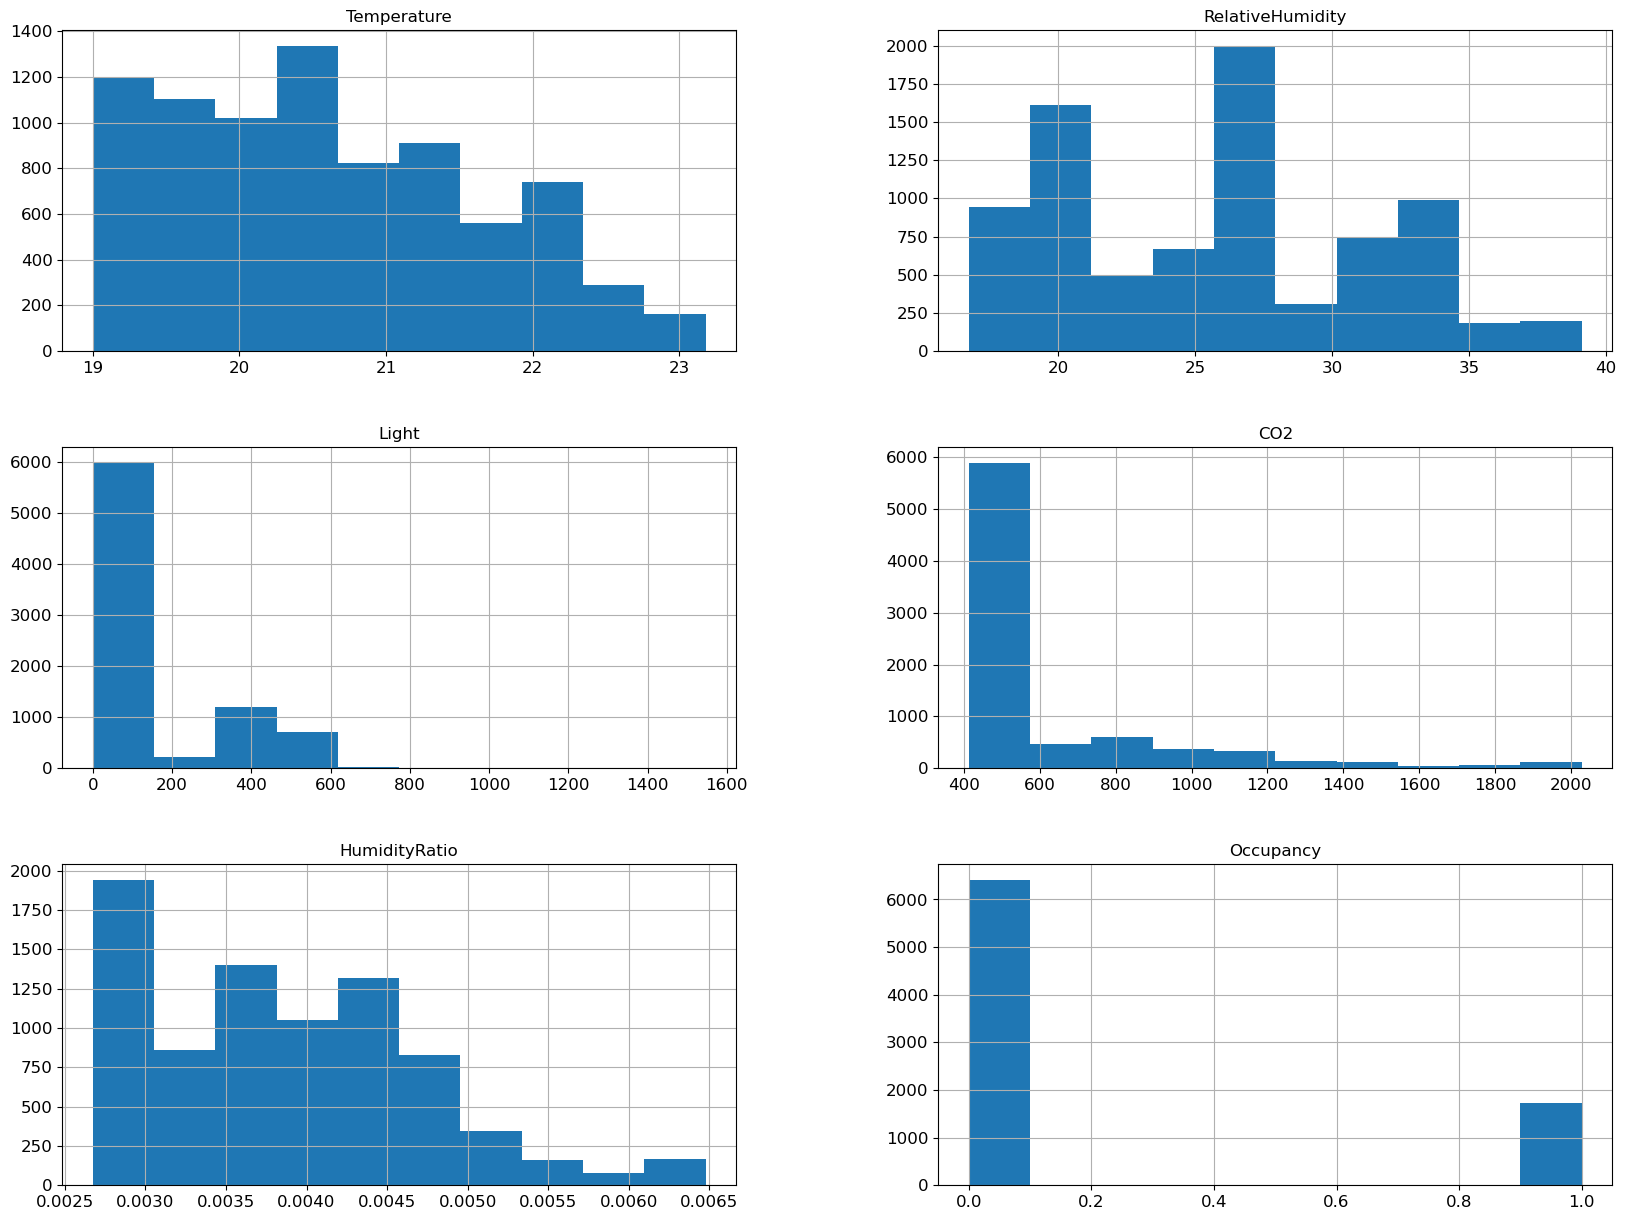

<Figure size 640x480 with 0 Axes>

In [3]:
# Matplot para plotar os histogramas
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

data_raw.hist(figsize=(20,15));
plt.figure();

Visualmente é posssível verificar que as variáveis não atendem a normalidade, além disso temos variável temporal que entraria como um X...

# Examinar estatística descritiva #

In [4]:
with pd.option_context('float_format', '{:.3f}'.format): 
    print(data_raw.describe())

       Temperature  RelativeHumidity    Light      CO2  HumidityRatio  \
count     8143.000          8143.000 8143.000 8143.000       8143.000   
mean        20.619            25.732  119.519  606.546          0.004   
std          1.017             5.531  194.756  314.321          0.001   
min         19.000            16.745    0.000  412.750          0.003   
25%         19.700            20.200    0.000  439.000          0.003   
50%         20.390            26.223    0.000  453.500          0.004   
75%         21.390            30.533  256.375  638.833          0.004   
max         23.180            39.117 1546.333 2028.500          0.006   

       Occupancy  
count   8143.000  
mean       0.212  
std        0.409  
min        0.000  
25%        0.000  
50%        0.000  
75%        0.000  
max        1.000  


# Separar a variável de interesse dos dados

In [5]:
# os dados de treino e teste já está separado

# 'Occupancy' é a variável dependente (o valor a ser predicto)
# Vamos então remover os rotulos/labels dos dados de treino e teste
label_columns = ['Occupancy']

training_columns = ['Date', 'Temperature', 'RelativeHumidity', 'Light', 'CO2', 'HumidityRatio']

# Separar a coluna occupancy dos demais dados
X_train, y_train = data_raw[training_columns].copy(), data_raw[label_columns].copy()
X_test, y_test = data_raw_test[training_columns].copy(), data_raw_test[label_columns].copy()

# Compare o numero de linhas e colunas nos dados originais do de treinoe teste.
print(f'Original:        {data_raw.shape}')
print('------------------------------')
print(f'features de treino:   {X_train.shape}')
print(f'features de teste:       {X_test.shape}')
print(f'labels de treino:     {y_train.shape}')
print(f'labels de teste:         {y_test.shape}')

Original:        (8143, 7)
------------------------------
features de treino:   (8143, 6)
features de teste:       (2665, 6)
labels de treino:     (8143, 1)
labels de teste:         (2665, 1)


# Converter a coluna `Date` em um formato datetime para o processamento

In [6]:
X_train['Date'] = pd.to_datetime(X_train['Date'])
X_test['Date'] = pd.to_datetime(X_test['Date'])

X_train.head()

,Date,Temperature,RelativeHumidity,Light,CO2,HumidityRatio
0,2015-02-05 19:37:00,21.200,19.840,0.0,525.333333,0.003082
1,2015-02-04 22:11:00,21.390,25.700,0.0,475.000000,0.004046
2,2015-02-09 13:51:00,21.245,32.925,474.5,1126.500000,0.005146
3,2015-02-05 20:36:00,21.200,19.390,0.0,472.500000,0.003012
4,2015-02-10 02:39:00,20.290,32.900,0.0,460.000000,0.004846


Temos que tomar cuidado ao utilizar data como variável explicativa de um modelo, então vamos ver quais informações essa featura poderia agregar.

# Determinar quais componentes tem valores unicos, qual time range.

In [7]:
# Extrair componentes datetime especificos e retornar valores unicos
print('ano unico:   {}'.format(X_train['Date'].dt.year.unique()))
print('meses unicos:  {}'.format(X_train['Date'].dt.month.unique()))
print('dias unicos:    {}'.format(X_train['Date'].dt.day.unique()))
print('horas unicas:   {}'.format(X_train['Date'].dt.hour.unique()))
print('minutos unicos: {}'.format(X_train['Date'].dt.minute.unique()))
print('segundos unicos: {}'.format(X_train['Date'].dt.second.unique()))

ano unico:   [2015]
meses unicos:  [2]
dias unicos:    [ 5  4  9 10  6  8  7]
horas unicas:   [19 22 13 20  2 21  7  6  9 18 16 15  4  0 23 17  3  8  5 12 11 10  1 14]
minutos unicos: [37 11 51 36 39 20 17 44  6 54 49 52 14 56 46 34  8 10 38 45 30 58  7 13
 12 42 31 23 28 16 33 43 53 47  9  1 21  4  5  0 59 22 50  3 26 24 29  2
 19 25 48 35 57 32 15 27 18 40 55 41]
segundos unicos: [0]


As informações foram coletadas em fevereiro de 2015, portanto mes e ano não agregam informação.
Os segundos não foram contados, portanto, provavelmente a menor granularidade de informação é minuto.
As features que trazem informação, portanto, são dia, hora e o minuto.

# Performar preparação comum no dataset de treino e teste

In [8]:
# Performar limpeza e feature engineering no datasets.
def prep_dataset(X):
    
    # FEATURE ENGINEERING
    
    # Extrair dias, horas, e minutos do timestamp.
    day = X['Date'].dt.day
    X['Day'] = day.astype('float64')
    
    hour = X['Date'].dt.hour
    X['Hour'] = hour.astype('float64')
    
    minute = X['Date'].dt.minute
    X['Minute'] = minute.astype('float64')

    return X

X_train = prep_dataset(X_train.copy())

X_test = prep_dataset(X_test.copy())

X_train.head()

,Date,Temperature,RelativeHumidity,Light,CO2,HumidityRatio,Day,Hour,Minute
0,2015-02-05 19:37:00,21.200,19.840,0.0,525.333333,0.003082,5.0,19.0,37.0
1,2015-02-04 22:11:00,21.390,25.700,0.0,475.000000,0.004046,4.0,22.0,11.0
2,2015-02-09 13:51:00,21.245,32.925,474.5,1126.500000,0.005146,9.0,13.0,51.0
3,2015-02-05 20:36:00,21.200,19.390,0.0,472.500000,0.003012,5.0,20.0,36.0
4,2015-02-10 02:39:00,20.290,32.900,0.0,460.000000,0.004846,10.0,2.0,39.0


# Dropar colunas que não vão ser usadas no treino

In [9]:
# 
def drop_unused(X):
    
    # A coluna foi dividida para modelação
    X = X.drop(['Date'], axis = 1)
    
    return X

print('Colunas antes do drop:\n\n{}\n'.format(list(X_train.columns)))
X_train = drop_unused(X_train.copy())
print('Colunas depois do drop:\n\n{}\n'.format(list(X_train.columns)))

X_test = drop_unused(X_test.copy())

Colunas antes do drop:

['Date', 'Temperature', 'RelativeHumidity', 'Light', 'CO2', 'HumidityRatio', 'Day', 'Hour', 'Minute']

Colunas depois do drop:

['Temperature', 'RelativeHumidity', 'Light', 'CO2', 'HumidityRatio', 'Day', 'Hour', 'Minute']



# Standardizar as features - normalização com z-score

As variáveis estão em dimensões diferentes, portanto é necessário aplicar alguma normalização.

In [10]:
def standardize(X):
    result = X.copy()
    
    for feature in X.columns:
        result[feature] = (X[feature] - X[feature].mean()) / X[feature].std()  # formula do z-score 
        
    return result

X_train = standardize(X_train)

X_test = standardize(X_test)



In [11]:
with pd.option_context('float_format', '{:.2f}'.format): 
    print(X_train.describe())

       Temperature  RelativeHumidity   Light     CO2  HumidityRatio     Day  \
count      8143.00           8143.00 8143.00 8143.00        8143.00 8143.00   
mean          0.00              0.00    0.00    0.00           0.00    0.00   
std           1.00              1.00    1.00    1.00           1.00    1.00   
min          -1.59             -1.62   -0.61   -0.62          -1.39   -1.84   
25%          -0.90             -1.00   -0.61   -0.53          -0.92   -0.64   
50%          -0.23              0.09   -0.61   -0.49          -0.07   -0.05   
75%           0.76              0.87    0.70    0.10           0.57    0.55   
max           2.52              2.42    7.33    4.52           3.07    1.75   

         Hour  Minute  
count 8143.00 8143.00  
mean     0.00    0.00  
std      1.00    1.00  
min     -1.61   -1.70  
25%     -0.90   -0.89  
50%     -0.06   -0.03  
75%      0.93    0.84  
max      1.64    1.70  


# Treinar o modelo MLP

Utilizei nesse primeiro modelo os hiperparametros comuns/por defeito da função MLPClassifier()
- hidden_layer_sizes especifica o número de camadas ocultas a serem incluídas na rede, bem como o número de neurónios em cada camada oculta. 
- activation especifica a função de ativação a ser usada. Neste caso é utilizado a Unidade Linear Retificado (ReLU), que retorna 0 para todos os valores negativos, e o próprio valor para valores positivos.
- solver especifica o método usado para minimizar custos e otimizar os pesos da conexão. O solucionador Adam é semelhante à descida gradiente estocástica
- alfa é a penalidade de regularização ℓ2 a ser aplicada. Aqui, o modelo está usando o valor padrão segundo a documentação.
- learning_rate_init é a taxa de aprendizado inicial a ser usada em solucionadores de gradiente descendente.
- max_iter é o número máximo de iterações que o solucionador realizará se não convergir primeiro.
- tol define um limite de tolerância a ser excedido pelo solucionador ao minimizar custos.
- no_iter_change é o número de iterações para as quais o solucionador pode falhar ao exceder tol antes de parar.
- verbose, quando definido como True, imprimirá a perda a cada iteração.

In [12]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes = (2),
                    activation = 'relu',
                    solver = 'adam',
                    alpha = 0.0001,
                    learning_rate_init = 0.001,
                    max_iter = 500,
                    tol = 1e-4,
                    n_iter_no_change = 10,
                    verbose = True,
                    random_state = 87)

mlp.fit(X_train, np.ravel(y_train))

score = mlp.score(X_test, y_test)

print('Accuracy: {:.0f}%'.format(score * 100))

Iteration 1, loss = 1.16269419
Iteration 2, loss = 1.03600133
Iteration 3, loss = 0.92748161
Iteration 4, loss = 0.83639512
Iteration 5, loss = 0.75906714
Iteration 6, loss = 0.69610768
Iteration 7, loss = 0.64566796
Iteration 8, loss = 0.60663824
Iteration 9, loss = 0.57428765
Iteration 10, loss = 0.54706771
Iteration 11, loss = 0.52377476
Iteration 12, loss = 0.50371568
Iteration 13, loss = 0.48655948
Iteration 14, loss = 0.47084110
Iteration 15, loss = 0.45558605
Iteration 16, loss = 0.43996704
Iteration 17, loss = 0.42248577
Iteration 18, loss = 0.40373155
Iteration 19, loss = 0.38504676
Iteration 20, loss = 0.36676078
Iteration 21, loss = 0.34937424
Iteration 22, loss = 0.33259220
Iteration 23, loss = 0.31682868
Iteration 24, loss = 0.30195704
Iteration 25, loss = 0.28834567
Iteration 26, loss = 0.27605004
Iteration 27, loss = 0.26485236
Iteration 28, loss = 0.25457228
Iteration 29, loss = 0.24510314
Iteration 30, loss = 0.23623345
Iteration 31, loss = 0.22804564
Iteration 32, los

A iteração 149 foi a 10ª iteração para a qual a perda não melhorou mais do que tol, então o solucionador parou aí.
A precisão deste modelo é de 88%.
Vamos usar a apenas a precisão como metrica de qualidade do modelo.

# Visualizar a perda de minimização através do gradiente descendente

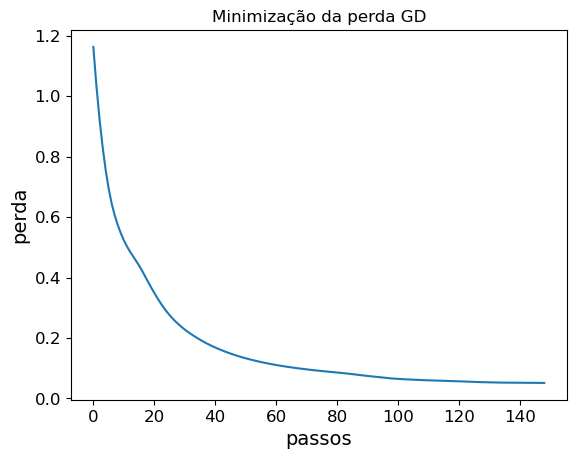

In [13]:
def plot_loss(model):
    plt.plot(model.loss_curve_)
    plt.title('Minimização da perda GD')
    plt.xlabel('passos')
    plt.ylabel('perda')
    
plot_loss(mlp)

A perda diminui drasticamente nas primeiras 20 iterações, mas depois disso a mudança é pequena. Se o tempo fosse um fator mais importante, poderíamos querer aumentar o valor de tol para que o solucionador não perdesse tempo em mais iterações com pouco ganho.

# Visualizar a arquitetura da rede neuronal

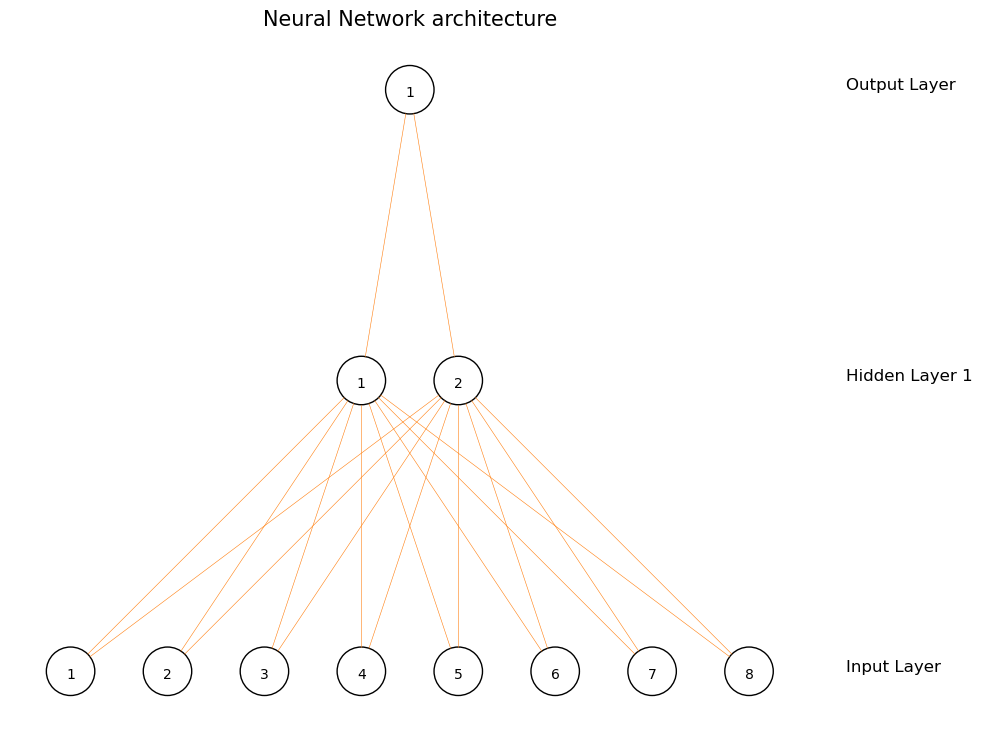

In [14]:
def nn_diagram(X, y, model, show_weights):

    # Crie uma estrutura de rede a partir de formas de conjuntos de dados e tamanhos de camadas ocultas
    nn_struct = np.hstack(([X.shape[1]], np.asarray(model.hidden_layer_sizes), [y.shape[1]]))

    # Somente plote pesos se especificado
    if show_weights == True:
        network = VisNN.DrawNN(nn_struct, model.coefs_)
    else:
        network = VisNN.DrawNN(nn_struct)
        
    network.draw()
    
nn_diagram(X_train, y_train, mlp, False)

A arquitetura da rede, como esperado, é dividida em camadas de entrada, hidden e de saída.
- A camada de entrada inclui oito neurônios, cada um mapeado para um recurso no conjunto de dados.
- A camada oculta possui dois neurônios. Este é o número de neurônios que  especificamos arbitrariamente em hidden_layer_sizes.
- A camada de saída possui um neurônio – a classificação de rótulo (0 ou 1, não-ocupado ou ocupado).
- Cada neurônio em uma camada está conectado a todos os neurônios da próxima camada.

# Recuperar os pesos dos neurônios e os termos de polarização e redesenhar a arquitetura da rede

In [15]:
print('Pesos entre a camada de entrada e a camada oculta:')
print(mlp.coefs_[0], '\n')
print('Pesos entre a camada oculta e a camada de saída:')
print(mlp.coefs_[1], '\n')
print('Termos de polarização entre a camada de entrada e a camada oculta:')
print(mlp.intercepts_[0], '\n')
print('Termos de polarização entre a camada oculta e a camada de saída:')
print(mlp.intercepts_[1])

Pesos entre a camada de entrada e a camada oculta:
[[-0.3438876   0.254666  ]
 [ 0.07710875 -0.35894019]
 [ 1.27571406 -1.05065641]
 [ 0.62432824 -1.29802377]
 [-0.42358403 -0.35945967]
 [ 0.09719079  0.53563612]
 [-0.1719664   0.10169442]
 [-0.09943472 -0.00328182]] 

Pesos entre a camada oculta e a camada de saída:
[[ 2.06152438]
 [-2.24583236]] 

Termos de polarização entre a camada de entrada e a camada oculta:
[0.48037193 1.30762661] 

Termos de polarização entre a camada oculta e a camada de saída:
[-2.74116309]


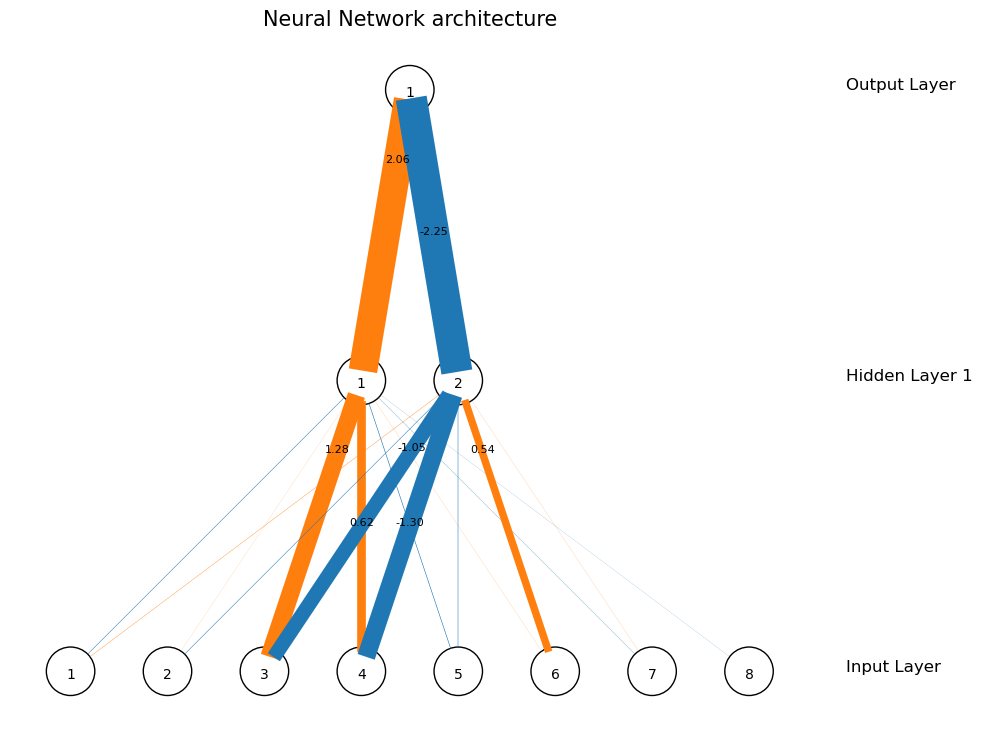

In [16]:
nn_diagram(X_train, y_train, mlp, True)

Desta vez, o diagrama de rede apresenta os pesos dos neurônios.
- Quanto mais espessa for a linha, mais forte será o peso.
- As linhas laranja indicam pesos positivos.
- As linhas azuis indicam pesos negativos.
- O valor do peso real é exibido para qualquer peso acima de 0,5 ou abaixo de -0,5 (ou seja, os pesos mais significativos).

Podemos verificar que as variáveis 3, 4 e 6 (luz, Co2 e dia) possuem algum peso na classificação do individuo.

Vamos utilizar um algoritmo para encontrar os melhores hiperparametros, visando obter uma maior accuracy, neste caso vamos usar o gridsearchcv.


# Ajustar o modelo MLP utilizando GridSearch com validação cruzada

In [17]:
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier(alpha = 0.0001,
                    learning_rate_init = 0.001,
                    max_iter = 500,
                    tol = 1e-4,
                    n_iter_no_change = 10,
                    random_state = 87)

grid = {'hidden_layer_sizes': [(5), (6)],
        'activation': ['logistic', 'tanh', 'relu'],
        'solver': ['sgd', 'adam']}

search = GridSearchCV(mlp, param_grid = grid, scoring = 'accuracy', cv = 5)

start = time()
search.fit(X_train, np.ravel(y_train))
end = time()
train_time = (end - start)

print('Grid search levou {:.2f} segundos para encontrar um ajuste ótimo'.format(train_time))
print(search.best_params_)

Grid search levou 113.76 segundos para encontrar um ajuste ótimo
{'activation': 'logistic', 'hidden_layer_sizes': 6, 'solver': 'sgd'}


- O algoritmo usará os mesmos valores numéricos para os hiperparâmetros usados anteriormente.
- A grade começa alternando entre ter uma camada oculta com cinco neurônios e uma camada oculta com seis neurônios.
- Cada uma das principais funções de ativação é tentada: a função logística (sigmóide), a função tanh e a função ReLU.
- São testadas duas técnicas de otimização de peso do tipo SGD. Eles tendem a ser mais úteis em grandes conjuntos de dados com milhares de exemplos de dados.
- Para economizar tempo, o campo de pesquisa é relativamente esparso. A pesquisa em grade está sendo usado aqui para que o resultado seja mais determinístico, mas em uma situação real, é mais comum usar a pesquisa aleatória.
- A busca na grade otimizará a precisão e realizará validação cruzada quíntupla nos dados de treinamento.
- A função de ativação ideal é a função logística.
- O número ideal de neurônios na camada oculta é seis.
- A técnica ideal de otimização de peso é SGD.

In [18]:
score = search.score(X_test, y_test)

print('Accuracy: {:.0f}%'.format(score * 100))

Accuracy: 94%


# Visualizar a minimização de perda do modelo otimizado

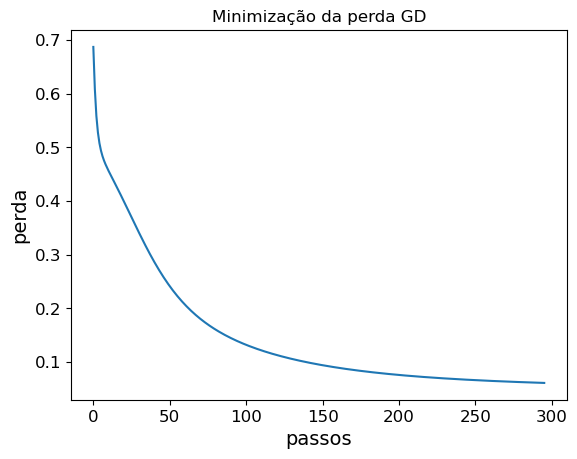

In [19]:
plot_loss(search.best_estimator_)

São necessários cerca de 300 passos para o solucionador convergir antes de não conseguir minimizar mais do que a tolerância
limite.

# Visualize a estrutura da rede do modelo otimizado

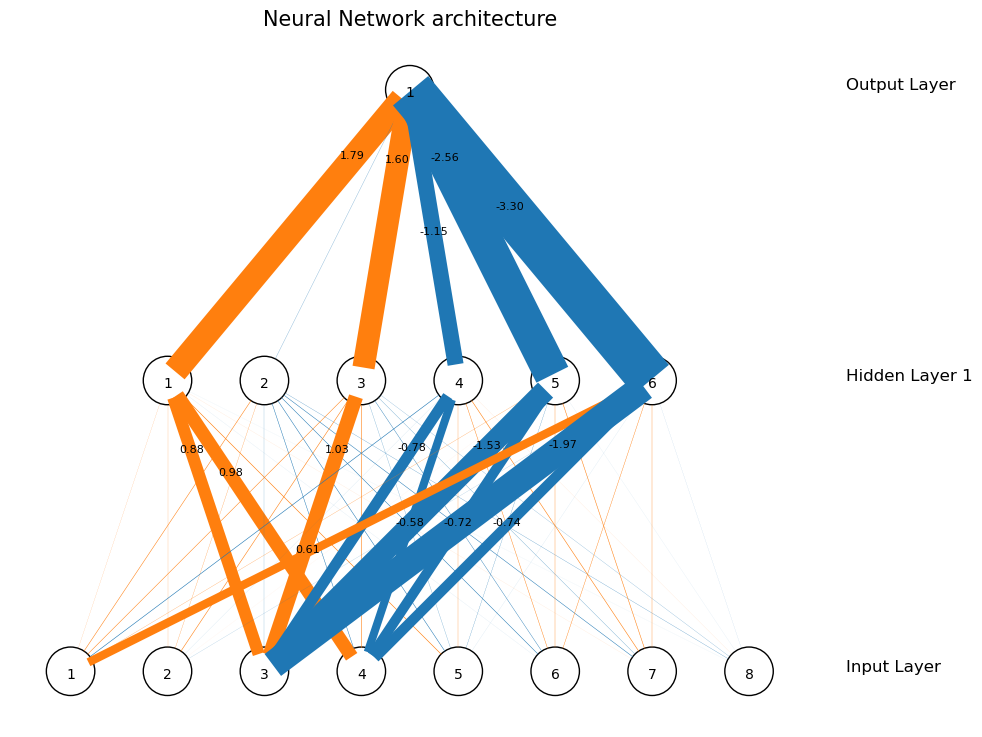

In [20]:
nn_diagram(X_train, y_train, search.best_estimator_, True)

- A camada de entrada e a camada de saída têm o mesmo número de neurônios, mas a camada oculta agora tem seis.
- Os pesos entre os neurônios mudaram. Embora alguns dos pesos sejam relativamente fracos, também existem muitos pesos mais fortes.
- As características 3 e 4 (Luz e CO2) parecem ter um forte peso positivo com os neurônios ocultos 1 e 3, ao mesmo tempo que têm um forte peso negativo com os neurônios ocultos 4, 5 e 6.
- A característica 1 (Temperatura) parece ter um peso positivo relativamente forte com o neurônio oculto 6.
- Os neurônios ocultos 1 e 3 têm forte peso positivo com o neurônio de saída.
- Os neurônios ocultos 4, 5 e 6 têm forte peso negativo com o neurônio de saída.
- O neurônio oculto 2 parece não ter grande peso em nenhuma camada, entrada ou saída.


A análise dos pesos e suas relações ajuda a entender como a rede está aprendendo a partir dos dados de entrada e a fazer previsões. Neste caso, considerando essas relações, é razoável inferir que as características de Luz, CO2 e Temperatura estão desempenhando um papel significativo na identificação da presença ou ausência de individuos no ambiente. Sendo que a Luz e o Co2 parecem ter uma forte influência nos neurônios ocultos, e esses neurônios, por sua vez, têm uma forte influência na camada de saída. Portanto, a presença ou ausência pode ser fortemente associada a padrões específicos nessas características.

# Examine as previsões do modelo no conjunto de testes

In [21]:
# mostre exemplos de predição com os dados de teste
results = data_raw_test.copy()
results['OccupancyPredicto'] = search.predict(X_test)
results.rename(columns = {'Occupancy': 'AtualOccupancy'}, inplace = True)  
results.head(50)

,Date,Temperature,RelativeHumidity,Light,CO2,HumidityRatio,AtualOccupancy,OccupancyPredicto
0,2/2/2015 23:49,20.650000,22.245000,0.000000,443.000000,0.003342,0,0
1,2/2/2015 21:10,20.890000,23.000000,0.000000,491.666667,0.003508,0,0
2,2/3/2015 19:56,21.245000,27.745000,0.000000,770.750000,0.004331,0,0
3,2/3/2015 5:51,20.290000,22.650000,0.000000,431.000000,0.003328,0,0
4,2/3/2015 2:12,20.525000,22.267500,0.000000,442.750000,0.003320,0,0
5,2/4/2015 8:50,21.200000,25.180000,454.000000,740.200000,0.003917,1,0
6,2/2/2015 17:19,22.500000,24.865000,433.000000,816.500000,0.004189,1,1
7,2/4/2015 9:56,23.200000,25.500000,722.000000,1011.400000,0.004485,1,1
8,2/4/2015 8:44,21.083333,25.200000,453.000000,719.500000,0.003892,1,0
9,2/3/2015 13:28,23.200000,25.550000,171.000000,918.000000,0.004494,0,0


In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(results['AtualOccupancy'], results['OccupancyPredicto'])

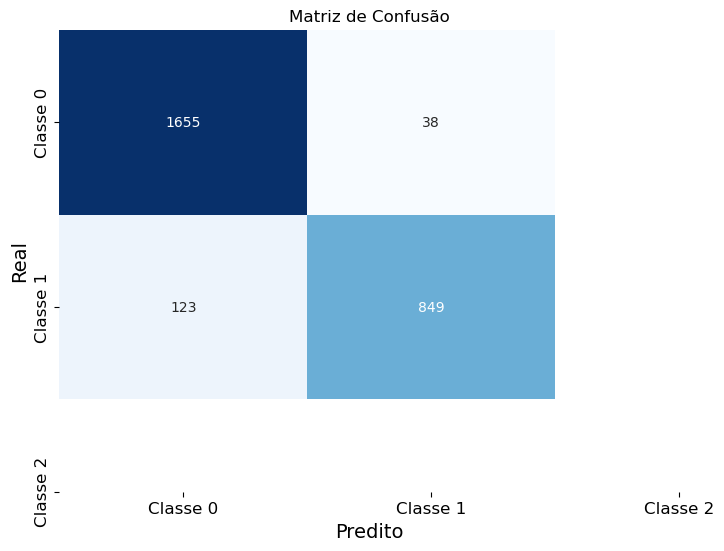

In [23]:

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1', 'Classe 2'],
            yticklabels=['Classe 0', 'Classe 1', 'Classe 2'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

    Verdadeiro Negativo (TN): 1655
    Falso Positivo (FP): 38
    Falso Negativo (FN): 123
    Verdadeiro Positivo (TP): 849

A taxa de acerto final foi de 94%, entretanto, verificamos que 123 casos foram erroneamente classificados como "presença/ocupado" quando na verdade eram "ausência/não ocupado". 
E 38 casos foram erroneamente classificados como "ausência/não ocupado" quando na verdade eram "presença/ocupados".

Para afinar esse modelo poderia ser adicionado mais camadas na rede. Pode ainda trabalhar mais nas funções de regularização e ativação.
Ou ainda, poderia acrescentar dados de sons ou de visão computacional.